In [28]:
# Import the required python modules.
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
%matplotlib inline

In [29]:
# In this analysis we will load the data file (davis.dat) from the disk and parse it to create the bipartite graph.
# We will then split the graph into the two sub-graphs, one for Women and one for the Meetings.
# We will then generate metrics on the seperate graphs.

In [30]:
# Read the data file from the disk. Update the path as appropriate to your machine.
dataFile = '/Users/burton/000-Semester_06_CUNY/620_Web_Analytics/Week_06/davis.dat'
# Open the raw data file for reading.
f = open(dataFile)
# The following boolean flags are used to determine the begining of various sections of the file like ROWS, COLUMNS etc.
rowsFound = False
columnsFound = False
dataFound = False
# The following lists will store the data for the ROWS, COLUMNS and DATA, which will be used to create our graph.
rowLabels = []
columnLables = []
data = []
# We now iterate over the file to fill in the lists defined above.
for line in iter(f):
    if (("ROW LABELS:" not in line) and (not rowsFound)):
       continue
    rowsFound = True
    if (("COLUMN LABELS:" not in line) and (not columnsFound)):
        if("ROW LABELS:" not in line):
            rowLabels.append(line.strip())
        continue
    columnsFound = True
    if (("DATA:" not in line) and (not dataFound)):
        if("COLUMN LABELS:" not in line):
            columnLables.append(line.strip())
        continue
    dataFound = True
    if("DATA:" not in line):
        data.append(line.strip())
f.close()

In [31]:
# In the next few sections we will print out the contents of the ROWS, COLUMNS and DATA sections from the lists that
# we created by reading the data file.

In [32]:
# Print  the Row labels (Women)
rowLabels

['EVELYN',
 'LAURA',
 'THERESA',
 'BRENDA',
 'CHARLOTTE',
 'FRANCES',
 'ELEANOR',
 'PEARL',
 'RUTH',
 'VERNE',
 'MYRNA',
 'KATHERINE',
 'SYLVIA',
 'NORA',
 'HELEN',
 'DOROTHY',
 'OLIVIA',
 'FLORA']

In [33]:
# Print  the Column labels (Meetings)
columnLables

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [34]:
# Print the data for the relationship between the Rows(Women) and the Columns(Meetings)
data

['1 1 1 1 1 1 0 1 1 0 0 0 0 0',
 '1 1 1 0 1 1 1 1 0 0 0 0 0 0',
 '0 1 1 1 1 1 1 1 1 0 0 0 0 0',
 '1 0 1 1 1 1 1 1 0 0 0 0 0 0',
 '0 0 1 1 1 0 1 0 0 0 0 0 0 0',
 '0 0 1 0 1 1 0 1 0 0 0 0 0 0',
 '0 0 0 0 1 1 1 1 0 0 0 0 0 0',
 '0 0 0 0 0 1 0 1 1 0 0 0 0 0',
 '0 0 0 0 1 0 1 1 1 0 0 0 0 0',
 '0 0 0 0 0 0 1 1 1 0 0 1 0 0',
 '0 0 0 0 0 0 0 1 1 1 0 1 0 0',
 '0 0 0 0 0 0 0 1 1 1 0 1 1 1',
 '0 0 0 0 0 0 1 1 1 1 0 1 1 1',
 '0 0 0 0 0 1 1 0 1 1 1 1 1 1',
 '0 0 0 0 0 0 1 1 0 1 1 1 1 1',
 '0 0 0 0 0 0 0 1 1 1 0 1 0 0',
 '0 0 0 0 0 0 0 0 1 0 1 0 0 0',
 '0 0 0 0 0 0 0 0 1 0 1 0 0 0']

In [35]:
# We will now create the main bipartite graph from the lists that we created above by reading the file.

In [36]:
# The following section creates the main bipartite graph by iterating through the Rows, Columns and Data.
main_graph = nx.Graph()
main_graph.add_nodes_from(rowLabels, bipartite=0)
main_graph.add_nodes_from(columnLables, bipartite=1)
for i in range(len(rowLabels)):
    data_List = data[i].split(' ')
    for  j in range(len(data_List)):
        if("1" in data_List[j]):
            main_graph.add_edge(rowLabels[i],columnLables[j])

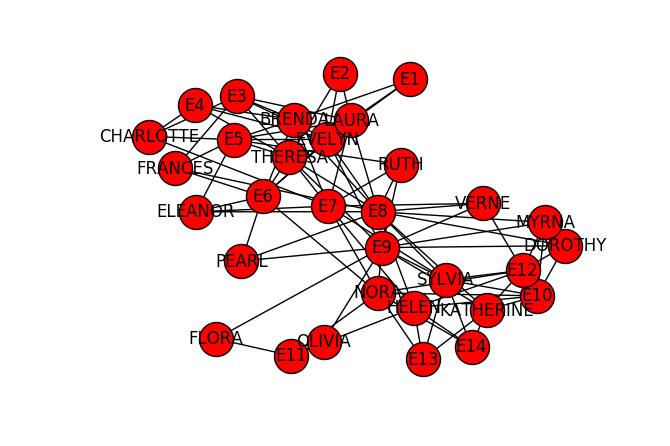

In [37]:
# Draw the main bipartite graph.
nx.draw_spring(main_graph, with_labels=True, node_size=600)

In [38]:
# We will now separate the Meeting nodes and the Women nodes from the main bipartite graph.
women_nodes, meeting_nodes = bipartite.sets(main_graph)

In [39]:
# Print the seperated Women nodes.
list(women_nodes)

['CHARLOTTE',
 'FLORA',
 'MYRNA',
 'BRENDA',
 'PEARL',
 'EVELYN',
 'THERESA',
 'FRANCES',
 'LAURA',
 'VERNE',
 'ELEANOR',
 'OLIVIA',
 'KATHERINE',
 'HELEN',
 'DOROTHY',
 'NORA',
 'SYLVIA',
 'RUTH']

In [40]:
# We now create the Women graph from the seperated woman nodes.
women_graph = bipartite.projected_graph(main_graph, women_nodes)

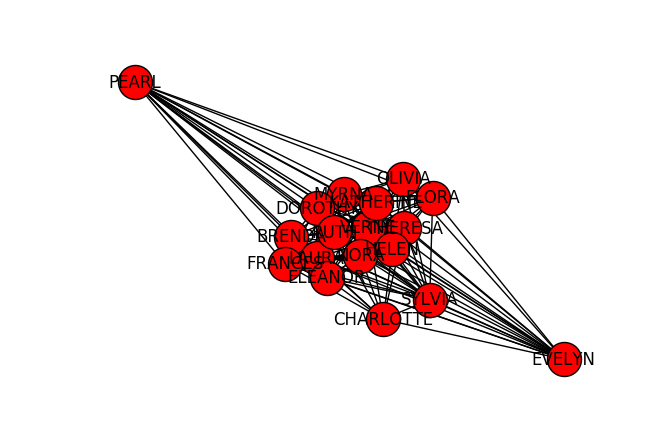

In [41]:
# We will now draw the Women grpah.
nx.draw_spring(women_graph, with_labels=True, node_size=600)

In [42]:
# Following are the degree centrality vlaues for the Women.
nx.degree_centrality(women_graph)

{'BRENDA': 0.8823529411764706,
 'CHARLOTTE': 0.6470588235294118,
 'DOROTHY': 0.9411764705882353,
 'ELEANOR': 0.8823529411764706,
 'EVELYN': 1.0,
 'FLORA': 0.7058823529411764,
 'FRANCES': 0.8823529411764706,
 'HELEN': 1.0,
 'KATHERINE': 0.9411764705882353,
 'LAURA': 0.8823529411764706,
 'MYRNA': 0.9411764705882353,
 'NORA': 1.0,
 'OLIVIA': 0.7058823529411764,
 'PEARL': 0.9411764705882353,
 'RUTH': 1.0,
 'SYLVIA': 1.0,
 'THERESA': 1.0,
 'VERNE': 1.0}

In [43]:
# Following are the between centrality vlaues for the Women.
nx.betweenness_centrality(women_graph)

{'BRENDA': 0.0026737967914438505,
 'CHARLOTTE': 0.0,
 'DOROTHY': 0.0053475935828877,
 'ELEANOR': 0.0026737967914438505,
 'EVELYN': 0.010122230710466005,
 'FLORA': 0.0,
 'FRANCES': 0.0026737967914438505,
 'HELEN': 0.010122230710466005,
 'KATHERINE': 0.0053475935828877,
 'LAURA': 0.0026737967914438505,
 'MYRNA': 0.0053475935828877,
 'NORA': 0.010122230710466005,
 'OLIVIA': 0.0,
 'PEARL': 0.0053475935828877,
 'RUTH': 0.010122230710466005,
 'SYLVIA': 0.010122230710466005,
 'THERESA': 0.010122230710466005,
 'VERNE': 0.010122230710466005}

In [44]:
# Following are the closeness centrality vlaues for the Women.
nx.closeness_centrality(women_graph)

{'BRENDA': 0.8947368421052632,
 'CHARLOTTE': 0.7391304347826086,
 'DOROTHY': 0.9444444444444444,
 'ELEANOR': 0.8947368421052632,
 'EVELYN': 1.0,
 'FLORA': 0.7727272727272727,
 'FRANCES': 0.8947368421052632,
 'HELEN': 1.0,
 'KATHERINE': 0.9444444444444444,
 'LAURA': 0.8947368421052632,
 'MYRNA': 0.9444444444444444,
 'NORA': 1.0,
 'OLIVIA': 0.7727272727272727,
 'PEARL': 0.9444444444444444,
 'RUTH': 1.0,
 'SYLVIA': 1.0,
 'THERESA': 1.0,
 'VERNE': 1.0}

In [45]:
# We now count the number of shared contacts for each woman.
print("No. of Friends, Member")
for woman in women_nodes:
    print('%d %s' % (women_graph.degree(woman),woman))

No. of Friends, Member
11 CHARLOTTE
12 FLORA
16 MYRNA
15 BRENDA
16 PEARL
17 EVELYN
17 THERESA
15 FRANCES
15 LAURA
17 VERNE
15 ELEANOR
12 OLIVIA
16 KATHERINE
17 HELEN
16 DOROTHY
17 NORA
17 SYLVIA
17 RUTH


In [46]:
# We now count the number of Friend meetings attended by each woman.
print("No. of Friend meetings, Member")
weighted_women_graph = bipartite.weighted_projected_graph(main_graph, women_nodes)
for woman in women_nodes:
    print('%d %s' % (weighted_women_graph.degree(woman,weight='weight'),woman))

No. of Friend meetings, Member
24 CHARLOTTE
14 FLORA
35 MYRNA
46 BRENDA
31 PEARL
50 EVELYN
57 THERESA
32 FRANCES
45 LAURA
39 VERNE
36 ELEANOR
14 OLIVIA
41 KATHERINE
42 HELEN
35 DOROTHY
47 NORA
50 SYLVIA
40 RUTH


In [47]:
# From the above output we can observer that the higher the number of friends that a member has, the greater the
# the number of meetings she attends. For e.g., THERESA has 57 friends and she attends one of  the highest number (17)
# of meetings, while OLIVIA has 14 friends and she just attends 12 meetings.
# From the above analysis we can see that EVELYN, THERESA, VERNE, HELEN, SYLVIA and RUTH have the highest number of
# shared contacts and they also have the higher measures of centrality that were shown in the earlier calculations 
# above. They are also the members who attend the highest number of meetings. This is what we could expect in a social
# setting.
# This is our conclusion.

In [48]:
# Below are similar metrics for the Meeting nodes. These are just provided for descriptive reasons and completion.

In [49]:
# Print the seperated Meeting nodes.
list(meeting_nodes)

['E11',
 'E10',
 'E13',
 'E12',
 'E14',
 'E9',
 'E8',
 'E5',
 'E4',
 'E7',
 'E6',
 'E1',
 'E3',
 'E2']

In [50]:
# We now create the Meetings graph from the seperated Meeting nodes.
meeting_graph = bipartite.projected_graph(main_graph, meeting_nodes)

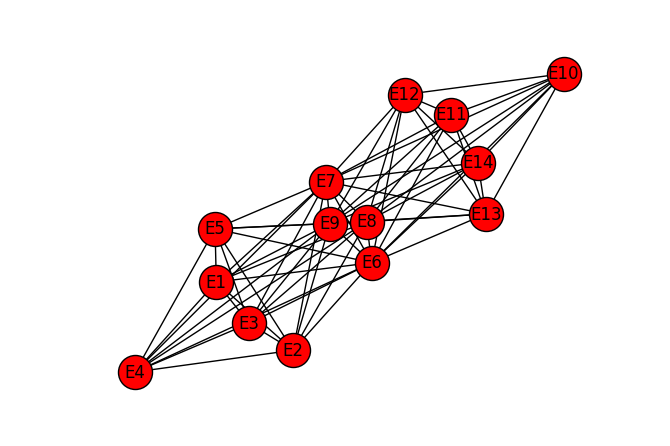

In [51]:
# We will now draw the Meetings grpah.
nx.draw_spring(meeting_graph, with_labels=True, node_size=600)

In [52]:
# Following are the degree centrality vlaues for the Meetings.
nx.degree_centrality(meeting_graph)

{'E1': 0.6153846153846154,
 'E10': 0.6153846153846154,
 'E11': 0.6153846153846154,
 'E12': 0.6153846153846154,
 'E13': 0.6153846153846154,
 'E14': 0.6153846153846154,
 'E2': 0.6153846153846154,
 'E3': 0.6153846153846154,
 'E4': 0.6153846153846154,
 'E5': 0.6153846153846154,
 'E6': 1.0,
 'E7': 1.0,
 'E8': 1.0,
 'E9': 1.0}

In [53]:
# Following are the betweenness centrality vlaues for the Meetings.
nx.betweenness_centrality(meeting_graph)

{'E1': 0.0,
 'E10': 0.0,
 'E11': 0.0,
 'E12': 0.0,
 'E13': 0.0,
 'E14': 0.0,
 'E2': 0.0,
 'E3': 0.0,
 'E4': 0.0,
 'E5': 0.0,
 'E6': 0.08012820512820512,
 'E7': 0.08012820512820512,
 'E8': 0.08012820512820512,
 'E9': 0.08012820512820512}

In [54]:
# Following are the closeness centrality vlaues for the Meetings.
nx.closeness_centrality(meeting_graph)

{'E1': 0.7222222222222222,
 'E10': 0.7222222222222222,
 'E11': 0.7222222222222222,
 'E12': 0.7222222222222222,
 'E13': 0.7222222222222222,
 'E14': 0.7222222222222222,
 'E2': 0.7222222222222222,
 'E3': 0.7222222222222222,
 'E4': 0.7222222222222222,
 'E5': 0.7222222222222222,
 'E6': 1.0,
 'E7': 1.0,
 'E8': 1.0,
 'E9': 1.0}